<a href="https://colab.research.google.com/github/negarhonarvar/Computer-Vision/blob/main/CountingStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/input4.txt'

# Open the file
with open(file_path, 'r') as file:
    first_line = file.readline()

width = int(first_line.rsplit(' ')[0])
height = int(first_line.rsplit(' ')[1])
expected_output = int(first_line.rsplit(' ')[2])


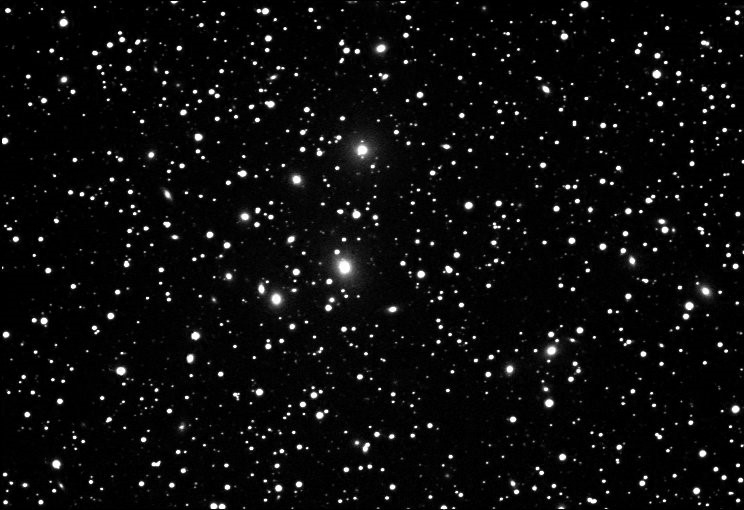

In [ ]:
data = np.genfromtxt(file_path, skip_header=1, dtype=str)
a = data[:, 1::3]
a = np.char.strip(a, ',')
a = a.astype(np.uint8)
cv2_imshow(a)

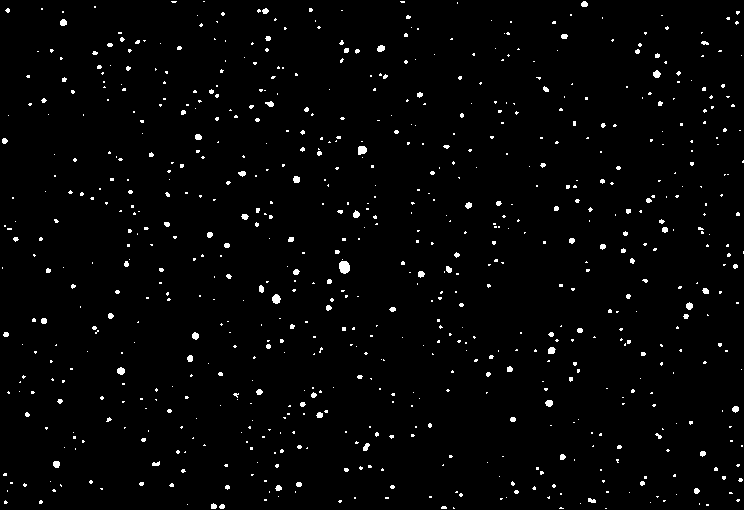

In [ ]:
# the image is polluted with salt and pepper noise
# to clarify the image , first we need to turn it to a black and with image
# then we turn it to a grayscale image
# later with median filter we will fully remove the noises from the image

threshold = 200
output_image = np.copy(a)

# Apply the threshold
output_image[a < threshold] = 0
output_image[a > threshold] = 255

# Create an output image from the NumPy array
output_image = Image.fromarray(output_image)
output_image.save('/content/drive/MyDrive/Colab Notebooks/image.jpg')
output_image

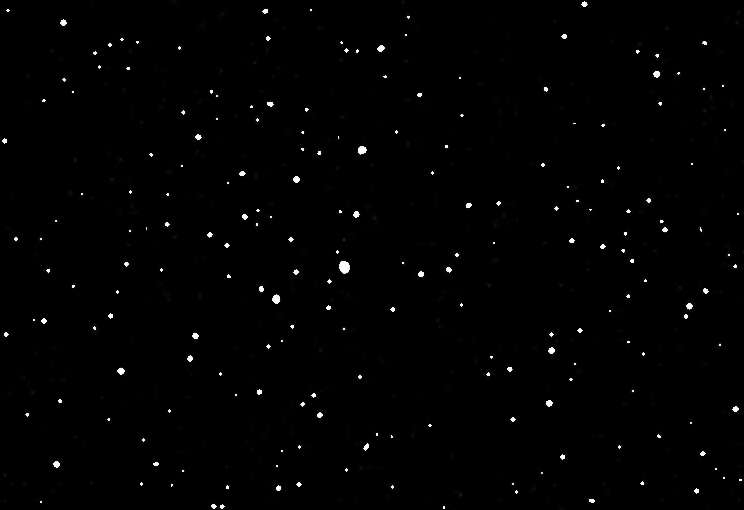

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# we could use max and min filter but median filter is more comprehensive
# Apply the median filter to remove noise
# set the kernel to its max value , if we choose a smaller value it might result in more noise
filtered_image = cv2.medianBlur(gray, 5)

# Save the filtered image
# cv2.imwrite('filtered_image.jpg', filtered_image)

# Display the filtered image
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
_, binary = cv2.threshold(filtered_image, 200, 255, cv2.THRESH_BINARY)
# Find contours in the image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Filter contours based on area to count the white dots
min_dot_area = 5 # Adjust this value as needed
white_dots = [contour for contour in contours if cv2.contourArea(contour) >= min_dot_area]

# Draw the white dots on a copy of the original image
result_image = filtered_image.copy()

In [ ]:
for dot in white_dots:
    M = cv2.moments(dot)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(f"Center of Identified Star: ({cX}, {cY})")

Center of Identified Star: (221, 506)
Center of Identified Star: (213, 505)
Center of Identified Star: (591, 500)
Center of Identified Star: (696, 490)
Center of Identified Star: (278, 487)
Center of Identified Star: (227, 486)
Center of Identified Star: (298, 484)
Center of Identified Star: (641, 482)
Center of Identified Star: (155, 463)
Center of Identified Star: (56, 463)
Center of Identified Star: (562, 456)
Center of Identified Star: (702, 453)
Center of Identified Star: (365, 446)
Center of Identified Star: (658, 435)
Center of Identified Star: (512, 419)
Center of Identified Star: (26, 414)
Center of Identified Star: (319, 414)
Center of Identified Star: (735, 408)
Center of Identified Star: (302, 403)
Center of Identified Star: (548, 402)
Center of Identified Star: (59, 400)
Center of Identified Star: (313, 394)
Center of Identified Star: (258, 391)
Center of Identified Star: (359, 376)
Center of Identified Star: (487, 373)
Center of Identified Star: (120, 370)
Center of Ident

Number of white dots: 105


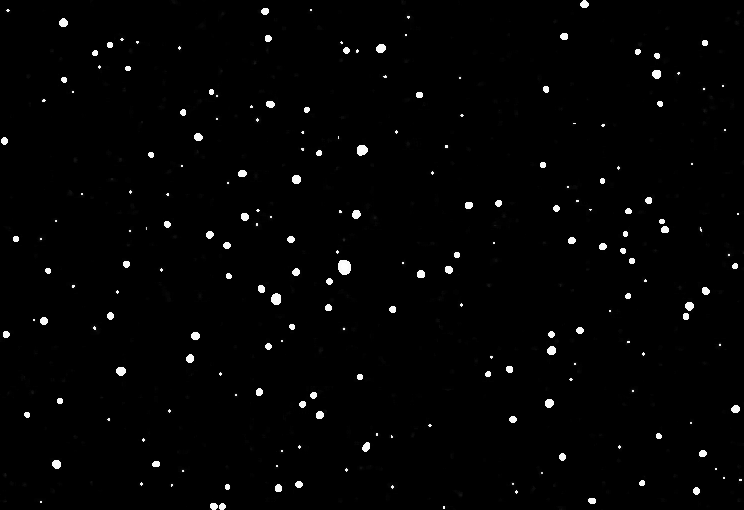

In [ ]:
# hugh white dots show the stars identified by our code
cv2.drawContours(result_image, white_dots, -1, (250, 250, 0), 2)

# Print the number of white dots
print(f"Number of white dots: {len(white_dots)}")

# Show the result image with contours
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()